In [26]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
# install.packages("dplyr") 
# install.packages("ggplot2") 
# install.packages("caret") 
# install.packages("e1071") 
# install.packages("cowplot") 
# install.packages("Matrix")
# install.packages("magrittr")
# install.packages("glmnet", dependencies=TRUE)
# install.packages("groupdata2")
# install.packages("randomForest")
# install.packages("data.table")   
# install.packages("class")
# install.packages("caTools")
# install.packages("mlbench")
# install.packages("pROC")
# install.packages("ROCR")
# install.packages("tidyverse")
# install.packages("xgboost")
# tar("libraryrf.tar.gz", "/usr/local/lib/R/site-library")

R[write to console]: Installing package into ‘/content/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xgboost_1.5.0.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1001991 bytes (978 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

In [ ]:
# %cp libraryrf.tar.gz gdrive/MyDrive

In [ ]:
%cp gdrive/MyDrive/libraryrf.tar.gz .

In [ ]:
!tar xf libraryrf.tar.gz

tar: Removing leading `/' from member names


In [ ]:
%%R
.libPaths('usr/local/lib/R/site-library/')

In [ ]:
%%R
library(data.table) 
library(ggplot2)  
library(caret)        
library(e1071)      
library(cowplot)    
library(Matrix)
library(magrittr)
#library(glmnet)
library(groupdata2)
library(class)
library(randomForest)
library(caTools)
library(mlbench)
library(pROC)
library(ROCR)
library(tidyverse)
#library(xgboost)

#Random Forest

In [40]:
%%R
data = read.csv("/content/gdrive/MyDrive/Data_science/DS_CP/diabetes.csv")

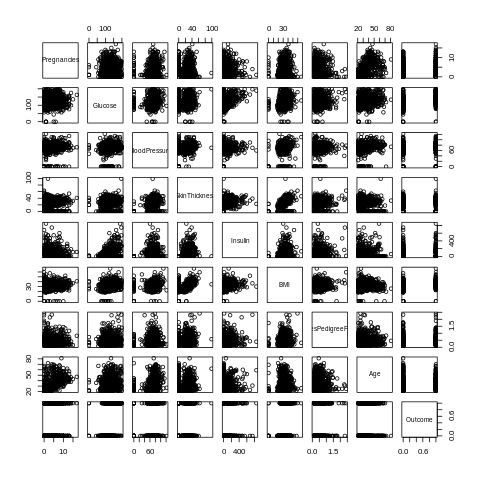

In [41]:
%%R
plot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0983b00b90>,
      dtype=object)

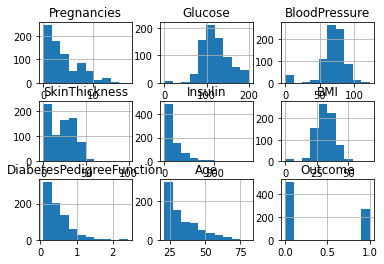

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/gdrive/MyDrive/Data_science/DS_CP/diabetes.csv")
df.hist()

In [44]:
%%R
print(summary(data))
print(str(data))

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [45]:
%%R
sapply(data, function(x) sum(is.na(x)))

             Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 


In [46]:
%%R
data$Outcome <- as.factor(data$Outcome)
table(data$Outcome)


  0   1 
500 268 


In [47]:
%%R
data<-upsample(
  data,
  cat_col= "Outcome",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE
)
print(table(data$Outcome))



  0   1 
500 500 


In [48]:
%%R
set.seed(222)
ind <- sample(2, nrow(data), replace = TRUE,prob = c(0.8,0.2))
train <- data[ind==1,]
test <- data[ind==2,]

In [49]:
%%R
set.seed(122)
rf <- randomForest(Outcome~., data = train,
                   ntree = 550, 
                   mtry = 2,
                   importance = TRUE,
                   proximity = TRUE)

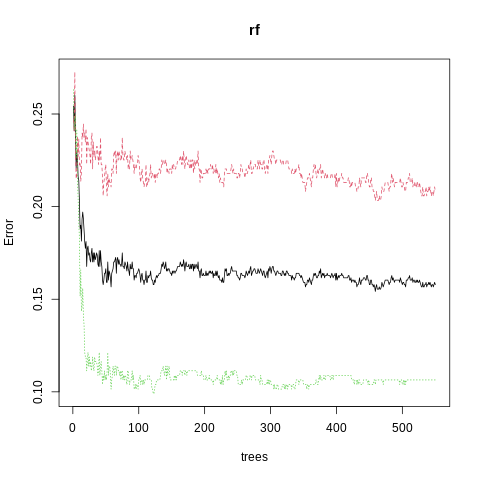

In [50]:
%%R
plot(rf)

In [51]:
%%R
p1 <- predict(rf,train)
confusionMatrix(p1, train$Outcome)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 413   0
         1   0 404
                                     
               Accuracy : 1          
                 95% CI : (0.9955, 1)
    No Information Rate : 0.5055     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5055     
         Detection Rate : 0.5055     
   Detection Prevalence : 0.5055     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     


In [52]:
%%R
p2 <- predict(rf,test)
cm = confusionMatrix(p2, test$Outcome)
print(cm)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 74  3
         1 13 93
                                          
               Accuracy : 0.9126          
                 95% CI : (0.8619, 0.9492)
    No Information Rate : 0.5246          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8238          
                                          
 Mcnemar's Test P-Value : 0.02445         
                                          
            Sensitivity : 0.8506          
            Specificity : 0.9688          
         Pos Pred Value : 0.9610          
         Neg Pred Value : 0.8774          
             Prevalence : 0.4754          
         Detection Rate : 0.4044          
   Detection Prevalence : 0.4208          
      Balanced Accuracy : 0.9097          
                                          
       'Positive' Class : 0               
                                    

In [53]:
%%R
ctable <- as.table(matrix(c(74, 3, 13, 93), nrow = 2, byrow = TRUE))

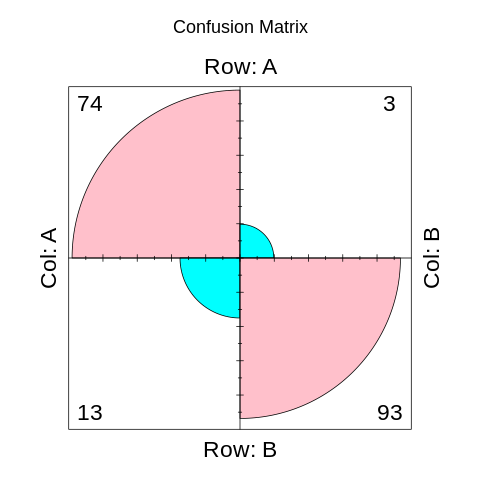

In [54]:
%%R
fourfoldplot(ctable, color = c("cyan", "pink"),
             conf.level = 0, margin = 1, main = "Confusion Matrix")

In [55]:
%%R
test$Outcome<-as.numeric(test$Outcome)
p2<-as.numeric(p2)
roc_rf<- roc(test$Outcome, p2)
roc_rf

R[write to console]: Setting levels: control = 1, case = 2

R[write to console]: Setting direction: controls < cases




Call:
roc.default(response = test$Outcome, predictor = p2)

Data: p2 in 87 controls (test$Outcome 1) < 96 cases (test$Outcome 2).
Area under the curve: 0.9097


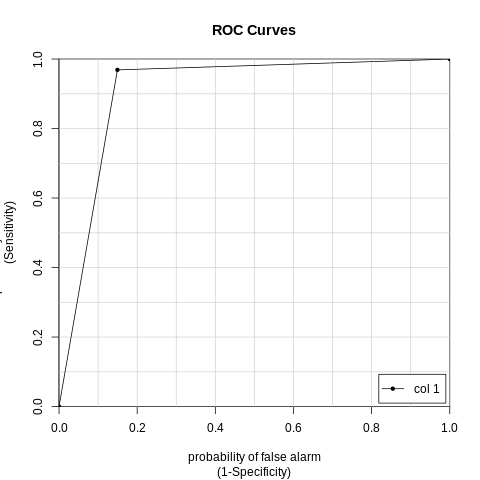

In [56]:
%%R
r_f = caTools::colAUC(p2, test$Outcome, plotROC = T)

#KNN

In [27]:
%%R
data(PimaIndiansDiabetes)
data <- PimaIndiansDiabetes

In [28]:
%%R
data<-upsample(
  data,
  cat_col= "diabetes",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE
)
print(table(data$diabetes))


neg pos 
500 500 


In [29]:
%%R
set.seed(123)
partition <- caret::createDataPartition(y = data$diabetes, times = 1, p = 0.8, list = FALSE)

In [30]:
%%R
# create training data set
train_set <- data[partition,]
print(train_set)
# create testing data set, subtracting the rows partition to get remaining 20% of the data
test_set <- data[-partition,]
print(test_set)

str(train_set)
str(test_set)

     pregnant glucose pressure triceps insulin mass pedigree age diabetes
2           1      89       66      23      94 28.1    0.167  21      neg
3           5     116       74       0       0 25.6    0.201  30      neg
4          10     115        0       0       0 35.3    0.134  29      neg
5           4     110       92       0       0 37.6    0.191  30      neg
6          10     139       80       0       0 27.1    1.441  57      neg
7           1     103       30      38      83 43.3    0.183  33      neg
8           3     126       88      41     235 39.3    0.704  27      neg
9           8      99       84       0       0 35.4    0.388  50      neg
10          1      97       66      15     140 23.2    0.487  22      neg
11         13     145       82      19     110 22.2    0.245  57      neg
12          5     117       92       0       0 34.1    0.337  38      neg
13          5     109       75      26       0 36.0    0.546  60      neg
14          3      88       58      11

In [31]:
%%R
set.seed(222)
model_knn <- caret::train(diabetes ~., data = train_set,
                          method = "knn",
                          metric = "ROC",
                          tuneGrid = expand.grid(.k = c(3:10)),
                          trControl = trainControl(method = "cv", number = 20,
                                                   classProbs = T, summaryFunction = twoClassSummary),
                          preProcess = c("center","scale","pca"))

In [32]:
%%R
pred_knn <- predict(model_knn, test_set)

In [33]:
%%R
cm_knn <- confusionMatrix(pred_knn, test_set$diabetes, positive="pos")

# Prediction Probabilities
pred_prob_knn <- predict(model_knn, test_set, type="prob")
# ROC value
roc_knn <- roc(test_set$diabetes, pred_prob_knn$pos)

R[write to console]: Setting levels: control = neg, case = pos

R[write to console]: Setting direction: controls < cases



In [35]:
%%R
roc_knn


Call:
roc.default(response = test_set$diabetes, predictor = pred_prob_knn$pos)

Data: pred_prob_knn$pos in 100 controls (test_set$diabetes neg) < 100 cases (test_set$diabetes pos).
Area under the curve: 0.8336


In [34]:
%%R
cm_knn

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  76  21
       pos  24  79
                                          
               Accuracy : 0.775           
                 95% CI : (0.7108, 0.8309)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 1.199e-15       
                                          
                  Kappa : 0.55            
                                          
 Mcnemar's Test P-Value : 0.7656          
                                          
            Sensitivity : 0.7900          
            Specificity : 0.7600          
         Pos Pred Value : 0.7670          
         Neg Pred Value : 0.7835          
             Prevalence : 0.5000          
         Detection Rate : 0.3950          
   Detection Prevalence : 0.5150          
      Balanced Accuracy : 0.7750          
                                          
       'Positive' Class : pos             
                              

In [37]:
%%R
model_knn

k-Nearest Neighbors 

800 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8), principal component signal
 extraction (8) 
Resampling: Cross-Validated (20 fold) 
Summary of sample sizes: 760, 760, 760, 760, 760, 760, ... 
Resampling results across tuning parameters:

  k   ROC        Sens    Spec  
   3  0.8271875  0.6925  0.7625
   4  0.8240000  0.6875  0.7650
   5  0.8203750  0.7250  0.7850
   6  0.8338125  0.7175  0.7775
   7  0.8273125  0.7075  0.7850
   8  0.8251250  0.7025  0.7650
   9  0.8195625  0.7125  0.7625
  10  0.8179375  0.7125  0.7625

ROC was used to select the optimal model using the largest value.
The final value used for the model was k = 6.


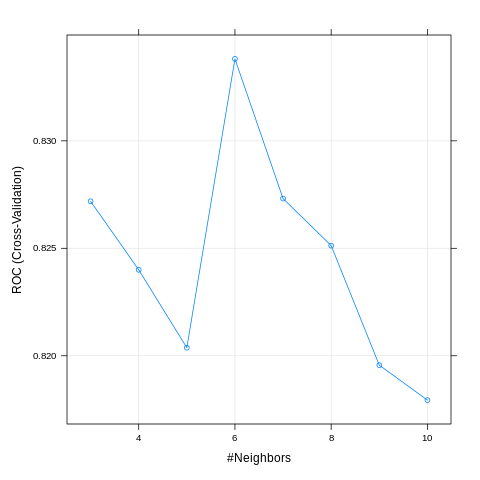

In [38]:
%%R
plot(model_knn)

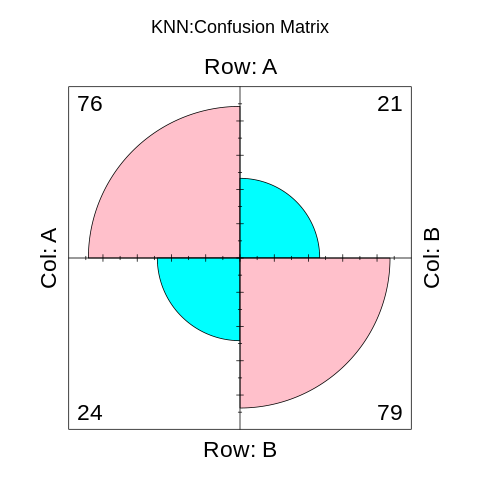

In [36]:
%%R
ctable <- as.table(matrix(c(76, 21, 24, 79), nrow = 2, byrow = TRUE))
fourfoldplot(ctable, color = c("cyan", "pink"),
             conf.level = 0, margin = 1, main = "KNN:Confusion Matrix")


#SVM

In [65]:
%%R
data(PimaIndiansDiabetes)
data <- PimaIndiansDiabetes

In [66]:
%%R
data<-upsample(
  data,
  cat_col= "diabetes",
  id_col = NULL,
  id_method = "n_ids",
  mark_new_rows = FALSE
)
print(table(data$diabetes))


neg pos 
500 500 


In [67]:
%%R
set.seed(123)
data$diabetes=as.factor(data$diabetes)
intrain <- createDataPartition(y = data$diabetes, p= 0.8, list = FALSE)
training <- data[intrain,]
testing <- data[-intrain,]

In [68]:
%%R
fitControl = trainControl(
  method = 'cv' , 
  number = 10 ,
  savePredictions = 'final' ,
  classProbs = T,
  summaryFunction = twoClassSummary
)

model_svm = caret::train(diabetes ~ . , data=training, method = 'svmRadial' ,metric="ROC", tuneLength = 5, trControl = fitControl) #SVM MODEL



model_svm

Support Vector Machines with Radial Basis Function Kernel 

800 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  C     ROC        Sens   Spec  
  0.25  0.8397500  0.755  0.7500
  0.50  0.8480000  0.755  0.7700
  1.00  0.8483125  0.745  0.7775
  2.00  0.8475625  0.745  0.7975
  4.00  0.8521250  0.745  0.8075

Tuning parameter 'sigma' was held constant at a value of 0.1225812
ROC was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.1225812 and C = 4.


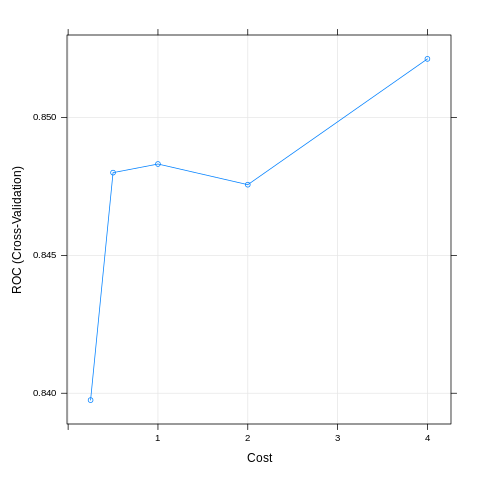

In [69]:
%%R
plot(model_svm)

In [70]:
%%R
pred_svm <- predict(model_svm, testing)
# Confusion Matrix 
cm_svm <- confusionMatrix(pred_svm, testing$diabetes, positive="pos")
pred_prob_svm <- predict(model_svm, testing, type="prob")
# ROC value
roc_svm <- roc(testing$diabetes, pred_prob_svm$pos)

R[write to console]: Setting levels: control = neg, case = pos

R[write to console]: Setting direction: controls < cases



In [71]:
%%R
roc_svm


Call:
roc.default(response = testing$diabetes, predictor = pred_prob_svm$pos)

Data: pred_prob_svm$pos in 100 controls (testing$diabetes neg) < 100 cases (testing$diabetes pos).
Area under the curve: 0.8846


In [72]:
%%R
cm_svm

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  77  13
       pos  23  87
                                          
               Accuracy : 0.82            
                 95% CI : (0.7596, 0.8706)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.64            
                                          
 Mcnemar's Test P-Value : 0.1336          
                                          
            Sensitivity : 0.8700          
            Specificity : 0.7700          
         Pos Pred Value : 0.7909          
         Neg Pred Value : 0.8556          
             Prevalence : 0.5000          
         Detection Rate : 0.4350          
   Detection Prevalence : 0.5500          
      Balanced Accuracy : 0.8200          
                                          
       'Positive' Class : pos             
                              

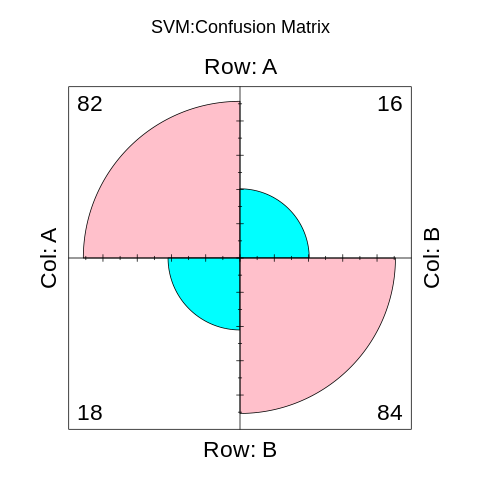

In [73]:
%%R
ctable <- as.table(matrix(c(82, 16, 18, 84), nrow = 2, byrow = TRUE))
fourfoldplot(ctable, color = c("cyan", "pink"),
             conf.level = 0, margin = 1, main = "SVM:Confusion Matrix")

#XGBOOST

In [74]:
%%R
data = read.csv('/content/gdrive/MyDrive/Data_science/DS_CP/diabetes.csv')

In [76]:
%%R
data<-upsample(
  data,
  cat_col= "Outcome",
  id_method = "n_ids",
)

In [77]:
%%R
set.seed(222) 
train_ind = sample.split(data, SplitRatio = 0.8)
train = data[train_ind,] #creates the training dataset with row numbers stored in train_ind
test= data[!train_ind,]
print("Dimensions of training set are:")
print(dim(train))
print("Dimensions of testing set are:")
dim(test)

[1] "Dimensions of training set are:"
[1] 777   9
[1] "Dimensions of testing set are:"
[1] 223   9


In [78]:
%%R
table(as.factor(train$Outcome))


  0   1 
389 388 


In [79]:
%%R
x1<- train[-c(9)]
x2<- test[-c(9)]

In [80]:
%%R
x1<-data.matrix(x1, rownames.force = NA)

In [81]:
%%R
y_train<-train$Outcome

In [82]:
%%R
install.packages("xgboost")

R[write to console]: Installing package into ‘/content/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xgboost_1.5.0.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1001991 bytes (978 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

In [83]:
%%R
library(xgboost)

R[write to console]: 
Attaching package: ‘xgboost’


R[write to console]: The following object is masked from ‘package:dplyr’:

    slice




In [84]:
%%R
bst <- xgboost(data = x1, label = y_train,max_depth = 6, eta = 0.07, subsample = 0.8, nthread = -1,nrounds = 50,objective = "binary:logistic")

[18:52:48] WARNING: amalgamation/../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[1]	train-logloss:0.659837 
[2]	train-logloss:0.632006 
[3]	train-logloss:0.604432 
[4]	train-logloss:0.579628 
[5]	train-logloss:0.557193 
[6]	train-logloss:0.537548 
[7]	train-logloss:0.518484 
[8]	train-logloss:0.502203 
[9]	train-logloss:0.485118 
[10]	train-logloss:0.470060 
[11]	train-logloss:0.456526 
[12]	train-logloss:0.444972 
[13]	train-logloss:0.432871 
[14]	train-logloss:0.420261 
[15]	train-logloss:0.409267 
[16]	train-logloss:0.399157 
[17]	train-logloss:0.388958 
[18]	train-logloss:0.379544 
[19]	train-logloss:0.370639 
[20]	train-logloss:0.362539 
[21]	train-logloss:0.356025 
[22]	train-logloss:0.348808 
[23]	train-logloss:0.342262 
[24]	train-logloss:0.335839 
[25]	train-logloss:0.330035 
[26]	train-logloss:

In [85]:
%%R
x2<-data.matrix(x2, rownames.force = NA)
y_test<-test$Outcome

In [86]:
%%R
pred <- predict(bst, x2)
# get & print the classification error
err <- mean(as.numeric(pred > 0.5) != y_test)
print(paste("test-error=", err))
accuracy = 1-err
print(paste("Accuracy of XGBoost model is:",accuracy))

[1] "test-error= 0.174887892376682"
[1] "Accuracy of XGBoost model is: 0.825112107623318"


In [87]:
%%R
pred_new<-as.numeric(pred>0.5)
pred_new<-as.factor(pred_new)
pred_new

  [1] 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0
 [38] 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0
[112] 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
[149] 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
[186] 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1
Levels: 0 1


In [88]:
%%R
y_test<-as.factor(y_test)
cm<- confusionMatrix(pred_new,y_test)
cm

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 87 15
         1 24 97
                                          
               Accuracy : 0.8251          
                 95% CI : (0.7688, 0.8726)
    No Information Rate : 0.5022          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.6501          
                                          
 Mcnemar's Test P-Value : 0.2002          
                                          
            Sensitivity : 0.7838          
            Specificity : 0.8661          
         Pos Pred Value : 0.8529          
         Neg Pred Value : 0.8017          
             Prevalence : 0.4978          
         Detection Rate : 0.3901          
   Detection Prevalence : 0.4574          
      Balanced Accuracy : 0.8249          
                                          
       'Positive' Class : 0               
                                    

In [89]:
%%R
y_test<-as.numeric(y_test)
pred_new<-as.numeric(pred_new)
roc_xgb<- roc(y_test, pred_new)
roc_xgb

R[write to console]: Setting levels: control = 1, case = 2

R[write to console]: Setting direction: controls < cases




Call:
roc.default(response = y_test, predictor = pred_new)

Data: pred_new in 111 controls (y_test 1) < 112 cases (y_test 2).
Area under the curve: 0.8249


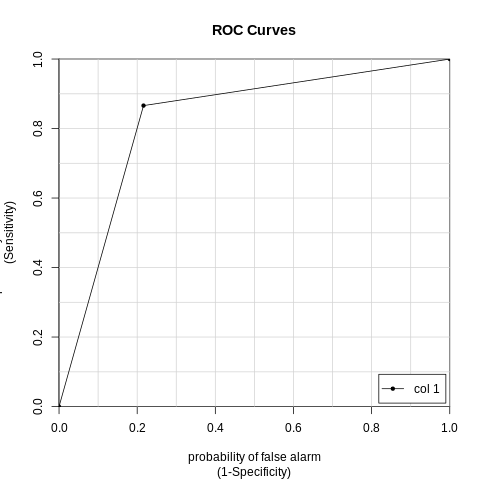

In [90]:
%%R
x_g = caTools::colAUC(pred_new, y_test, plotROC = T)

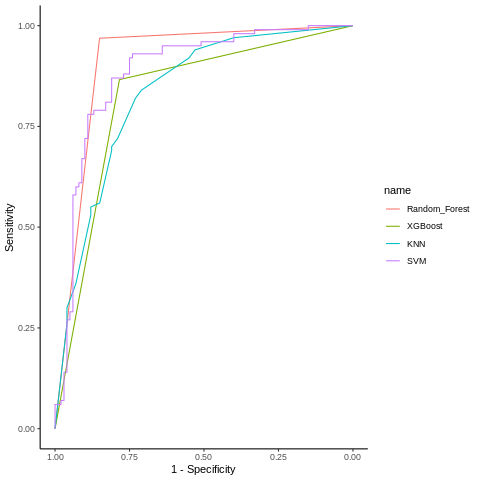

In [100]:
%%R
plot_roc = ggroc(list(Random_Forest=roc_rf,XGBoost=roc_xgb,KNN=roc_knn,SVM=roc_svm))+ 
labs(x = "1 - Specificity", y = "Sensitivity",linetype = "Different legend title")  +theme_classic()
plot_roc

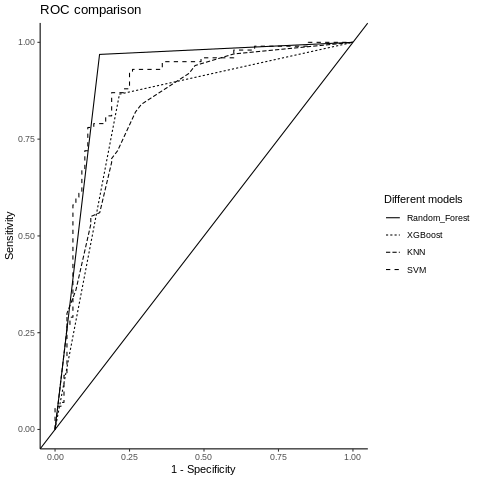

In [105]:
%%R
roclist= list(Random_Forest=roc_rf,XGBoost=roc_xgb,KNN=roc_knn,SVM=roc_svm)
g <- ggroc(roclist, aes = "linetype", legacy.axes = TRUE) +
  geom_abline() +
  theme_classic() +
  ggtitle("ROC comparison") +
  labs(x = "1 - Specificity",
       y = "Sensitivity",
       linetype = "Different models")
g

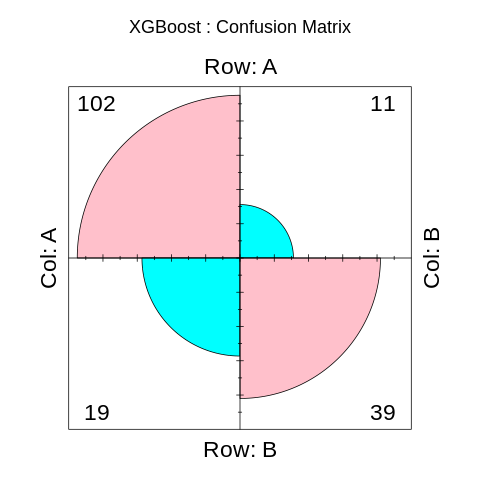

In [ ]:
%%R
ctable <- as.table(matrix(c(102, 11, 19, 39), nrow = 2, byrow = TRUE))
fourfoldplot(ctable, color = c("cyan", "pink"),
             conf.level = 0, margin = 1, main = "XGBoost : Confusion Matrix")